In [69]:
import pandas as pd
import os
import json
from tqdm.auto import tqdm
import networkx as nx
import semanticscholar as sch
import urllib
import json
import requests
from fuzzywuzzy import fuzz
import statistics
from networkx.algorithms.dag import descendants
import matplotlib.pyplot as plt

In [3]:
# paper_attributes = pd.read_csv("paper_attributes.csv")
# our_paper_attributes =  paper_attributes[paper_attributes['Attribute'].isin(['AA.AfId','AA.AfN','AA.AuId','AA.AuN','AA.S','AW','BT','BV','C.CId','C.CN','CC','CitCon','D','ECC','F.FId','F.FN','Id','Pt','RId','Ti','Y'])]
# our_paper_attributes

In [4]:
cur_path = os.getcwd()

file_path_iclr = os.path.relpath('..\\data\\paper_data_mag\\MAG_ICLR.json', cur_path)
file_path_acl = os.path.relpath('..\\data\\paper_data_mag\\MAG_ACL.json', cur_path)
file_path_cvpr = os.path.relpath('..\\data\\paper_data_mag\\MAG_CVPR.json', cur_path)
file_path_emnlp = os.path.relpath('..\\data\\paper_data_mag\\MAG_EMNLP.json', cur_path)
file_path_iccv = os.path.relpath('..\\data\\paper_data_mag\\MAG_ICCV.json', cur_path)
file_path_iclr = os.path.relpath('..\\data\\paper_data_mag\\MAG_ICLR.json', cur_path)
file_path_icml = os.path.relpath('..\\data\\paper_data_mag\\MAG_ICML.json', cur_path)
file_path_naacl = os.path.relpath('..\\data\\paper_data_mag\\MAG_NAACL.json', cur_path)
file_path_neurips = os.path.relpath('..\\data\\paper_data_mag\\MAG_NEURIPS.json', cur_path)

In [5]:
def create_paper_data_df(file_path):
    with open(file_path) as f_in:
        paper_data_dict = json.load(f_in)
    paper_data_records = paper_data_dict['entities']
    paper_data_df = pd.DataFrame.from_records(paper_data_records)
    return paper_data_df

def fuzzy_matching(x,y):
    return True if fuzz.partial_ratio(x,y) > 90 else False

In [ ]:
iclr_paper_data = create_paper_data_df(file_path_iclr)
references_list_iclr = [(rid,row['Id']) for idx,row in tqdm(iclr_paper_data.iterrows()) if type(row['RId'])!=float for rid in row['RId']]

acl_paper_data = create_paper_data_df(file_path_acl)
references_list_acl = [(rid,row['Id']) for idx,row in tqdm(acl_paper_data.iterrows()) if type(row['RId'])!=float for rid in row['RId']]

cvpr_paper_data = create_paper_data_df(file_path_cvpr)
references_list_cvpr = [(rid,row['Id']) for idx,row in tqdm(cvpr_paper_data.iterrows()) if type(row['RId'])!=float for rid in row['RId']]

emnlp_paper_data = create_paper_data_df(file_path_emnlp)
references_list_emnlp = [(rid,row['Id']) for idx,row in tqdm(emnlp_paper_data.iterrows()) if type(row['RId'])!=float for rid in row['RId']]

iccv_paper_data = create_paper_data_df(file_path_iccv)
references_list_iccv = [(rid,row['Id']) for idx,row in tqdm(iccv_paper_data.iterrows()) if type(row['RId'])!=float for rid in row['RId']]

icml_paper_data = create_paper_data_df(file_path_icml)
references_list_icml = [(rid,row['Id']) for idx,row in tqdm(icml_paper_data.iterrows()) if type(row['RId'])!=float for rid in row['RId']]

naacl_paper_data = create_paper_data_df(file_path_naacl)
references_list_naacl = [(rid,row['Id']) for idx,row in tqdm(naacl_paper_data.iterrows()) if type(row['RId'])!=float for rid in row['RId']]

neurips_paper_data = create_paper_data_df(file_path_neurips)
references_list_neurips = [(rid,row['Id']) for idx,row in tqdm(neurips_paper_data.iterrows()) if type(row['RId'])!=float for rid in row['RId']]


In [23]:
all_paper_data_df = pd.concat([iclr_paper_data, acl_paper_data, cvpr_paper_data, emnlp_paper_data, iccv_paper_data, icml_paper_data, naacl_paper_data, neurips_paper_data])
all_paper_data_df.to_pickle("..\\data\\all_paper_data.pkl")

In [11]:
all_paper_data_df = pd.read_pickle("..\\data\\all_paper_data.pkl")


In [ ]:
aw = all_paper_data_df.set_index('Id')['AW']
f = all_paper_data_df.set_index('Id')['F']

In [25]:
reference_df_iclr = pd.DataFrame(references_list_iclr, columns=['this_paper_infected','got_infected_by'])
reference_df_acl = pd.DataFrame(references_list_acl, columns=['this_paper_infected','got_infected_by'])
reference_df_cvpr = pd.DataFrame(references_list_cvpr, columns=['this_paper_infected','got_infected_by'])
reference_df_emnlp = pd.DataFrame(references_list_emnlp, columns=['this_paper_infected','got_infected_by'])
reference_df_iccv = pd.DataFrame(references_list_iccv, columns=['this_paper_infected','got_infected_by'])
reference_df_icml = pd.DataFrame(references_list_icml, columns=['this_paper_infected','got_infected_by'])
reference_df_naacl = pd.DataFrame(references_list_naacl, columns=['this_paper_infected','got_infected_by'])
reference_df_neurips = pd.DataFrame(references_list_neurips, columns=['this_paper_infected','got_infected_by'])

reference_df = pd.concat([reference_df_iclr, reference_df_acl, reference_df_cvpr, reference_df_emnlp, reference_df_iccv, reference_df_icml, reference_df_naacl, reference_df_neurips])
reference_df.to_pickle("..\\data\\networks\\citation_network.pkl")

In [9]:
reference_df = pd.read_pickle('..\\data\\networks\\citation_network.pkl')
reference_df

,this_paper_infected,got_infected_by
0,2963403868,2785994986
1,2963207607,2785994986
2,2134557905,2785994986
3,2154579312,2785994986
4,2966661,2785994986
...,...,...
2191,2482888308,2897127218
2192,2057624533,2897127218
2193,2103458172,2897127218
2194,2136885855,2897127218


In [12]:
valid_idx_infection = []
all_paper_ids = set(all_paper_data_df['Id'].values)
aw = all_paper_data_df.set_index('Id')['AW']
f = all_paper_data_df.set_index('Id')['F']
# print(all_paper_ids)
for idx,row in tqdm(reference_df.iterrows()):
    
    source = row['this_paper_infected']
    destination = row['got_infected_by']
    if source in all_paper_ids and destination in all_paper_ids:
        source_abstract = aw.at[source]
        dest_abstract = aw.at[destination]
        source_fos = f.at[source]
        dest_fos = f.at[destination]
        
        # Make sure these fields aren't NaNs
        if type(source_abstract) != float and type(dest_abstract) != float and type(source_fos) != float and type(dest_fos) != float:
            #abstract overlap
            source_abstract = set(source_abstract)
            dest_abstract = set(dest_abstract)
            abstract_overlap_score = len(set.intersection(source_abstract,dest_abstract))/min(len(source_abstract), len(dest_abstract))
            #FOS overlap
            source_fos = set([pair['FN'] for pair in source_fos])
            dest_fos = set([pair['FN'] for pair in dest_fos])
            fos_overlap_score = len(set.intersection(source_fos,dest_fos))/min(len(source_fos), len(dest_fos))
            if abstract_overlap_score > 0.1 and fos_overlap_score > 0.1:
                valid_idx_infection.append(idx)


In [13]:
infected_df = reference_df.iloc[valid_idx_infection, :]
infected_df.to_pickle("..\\data\\networks\\citation_infection_network.pkl")
infected_df = pd.read_pickle("..\\data\\networks\\citation_infection_network.pkl")
infected_df

,this_paper_infected,got_infected_by
6,2576915720,2785994986
7,2136026194,2785994986
8,2340427832,2785994986
13,2963403868,2996428491
14,2250539671,2996428491
...,...,...
2143,2963108696,2995358843
2151,2155027007,2996031640
2158,2950492145,2996031640
2166,1533861849,2995492258


In [14]:
cur_path = os.getcwd()
review_df = pd.read_pickle("../data/paper_quality/review_data.pkl")

review_df['mag_id'] = [None]*len(review_df)
for idx,row in tqdm(all_paper_data_df.iterrows()):
    if row['Y'] != 2018:
        continue
    if row['C']['CN'] != 'iclr':
        continue
    match_series = review_df['title'].apply(lambda x : fuzzy_matching(x,row['Ti']))
    match = review_df.loc[match_series == True]
    if len(match)>0:
        review_df.loc[match.index[0],'mag_id'] = row['Id']

In [15]:
review_df_with_mag_id = review_df.query('mag_id > 0')

In [36]:
review_df.to_pickle("..\\data\\paper_quality\\review_data_with_mag_id.pkl")
review_df_with_mag_id = pd.read_pickle("..\\data\\paper_quality\\review_data_with_mag_id.pkl")

In [52]:
review_df_updated = pd.read_pickle("..\\data\\paper_quality\\iclr_matched_papers.pkl")
review_df_updated

,mag_id,title,avg_review_score,afids,afns
0,2963745360,certifying some distributional robustness with...,9.000000,"[111088046, 111088046, 111088046]","[boston university, boston university, boston ..."
1,2755806193,towards neural phrasebased machine translation,6.666667,"[1290206253, 1291425158, 157725225, 1290206253...","[microsoft, google, university of illinois at ..."
2,2963694384,weightless lossy weight encoding for deep neur...,5.333333,"[125989756, 19880235, 125989756, 118501908, 11...","[skolkovo institute of science and technology,..."
3,2962891854,interactive grounded language acquisition and ...,6.333333,"[219193219, 170897317, 98301712]","[purdue university, duke university, baidu]"
4,2963166610,countering adversarial images using input tran...,6.333333,"[154570441, 154570441, 154570441, 154570441]","[university of california santa barbara, unive..."
...,...,...,...,...,...
411,2964139811,fraternal dropout,5.333333,"[74801974, 74801974, 74801974, 111088046]","[university of tokyo, university of tokyo, uni..."
412,2963695795,wsnet learning compact and efficient networks ...,5.666667,"[1341412227, 1341412227, 1341412227]","[ibm, ibm, ibm]"
413,2786230348,deep learning mutation prediction enables earl...,5.666667,"[205783295, 53964585, 205783295, 205783295, 16...","[cornell university, weizmann institute of sci..."
414,2962875400,covariant compositional networks for learning ...,5.333333,"[40347166, 40347166, 40347166, 160992636]","[university of chicago, university of chicago,..."


In [37]:
edge_endpoints = set(infected_df.values.flatten())
print(len(edge_endpoints))

36578


In [57]:
patient_zero_ids = [row['mag_id'] for idx,row in review_df_updated.iterrows() if row['mag_id'] is not None]
patient_zero_ratings = [review_df_updated[review_df_updated['mag_id'] == mag_id]['avg_review_score'].values[0] for mag_id in patient_zero_ids]

none_counter = 0
counter = 0
affiliation_df = pd.read_pickle("..\\data\\prestige\\prestige_data.pkl")
patient_zero_prestiges = []
for patient_zero in patient_zero_ids:
    #author_affiliations = [authdict['AfId'] for authdict in all_paper_data_df[all_paper_data_df['Id'] == patient_zero]['AA'].values[0]]
    author_affiliations = review_df_updated[review_df_updated['mag_id']==patient_zero]['afids'].values[0]
    prestiges = [affiliation_df[affiliation_df['id'] == affiliation]['prestige'].values[0] for affiliation in author_affiliations if affiliation is not None]
    prestiges = [item for item in prestiges if str(item) != 'nan']
    if len(prestiges)>0:
        patient_zero_prestiges.append(statistics.mean(prestiges))
        counter += 1
    else:
        patient_zero_prestiges.append(None)
        none_counter += 1

print(counter)
print(none_counter)

patient_zero_df = pd.DataFrame()
patient_zero_df['mag_id'] = patient_zero_ids
patient_zero_df['rating'] = patient_zero_ratings
patient_zero_df['prestige'] = patient_zero_prestiges
patient_zero_df = patient_zero_df[~patient_zero_df['prestige'].isnull()]
patient_zero_df = patient_zero_df[patient_zero_df['mag_id'].map(lambda x: x in edge_endpoints)]
patient_zero_df

217
199


,mag_id,rating,prestige
3,2962891854,6.333333,0.248911
9,2963420658,7.000000,0.496263
11,2923023063,6.000000,0.330826
16,2963564796,6.333333,0.571592
17,2963477238,6.666667,0.248911
...,...,...,...
405,2963780574,6.250000,0.725119
406,2963088756,5.666667,0.878647
407,2787178869,7.000000,0.300273
411,2964139811,6.666667,0.197850


In [62]:
G_infection = nx.from_pandas_edgelist(infected_df, source='this_paper_infected', target='got_infected_by',create_using=nx.DiGraph())

In [63]:
patient_zero_df['descendants'] = patient_zero_df.loc[~patient_zero_df['prestige'].isnull(),'mag_id'].map(lambda x : descendants(G_infection,x))
patient_zero_df['n_descendants'] = patient_zero_df['descendants'].map(len)
patient_zero_df.shape

(123, 5)

In [64]:
network_list = []
founders_list = []
for idx,row in patient_zero_df.iterrows():
    founder = row['mag_id']
    authorset_founders = all_paper_data_df[all_paper_data_df['Id']==founder]['AA'].values[0]
    founders_list.append(authorset_founders)
    descendants = row['descendants']
    network = []
    for descendant in descendants:
        authorset = all_paper_data_df[all_paper_data_df['Id']==descendant]['AA'].values[0]
        network.extend(authorset)
    network_list.append(network)
patient_zero_df['descendants_network'] = network_list
patient_zero_df['founders_network'] = network_list

In [66]:
patient_zero_df.to_pickle("..\\data\\patient_zero_data.pkl")

In [67]:
patient_zero_df

,mag_id,rating,prestige,descendants,n_descendants,descendants_network,founders_network
3,2962891854,6.333333,0.248911,"{2964267256, 2962732398}",2,"[{'AuN': 'haichao zhang', 'AuId': 2135445600, ...","[{'AuN': 'haichao zhang', 'AuId': 2135445600, ..."
9,2963420658,7.000000,0.496263,"{2963938169, 3034834827, 2972376180}",3,"[{'AuN': 'aaditya prakash', 'AuId': 2531407982...","[{'AuN': 'aaditya prakash', 'AuId': 2531407982..."
11,2923023063,6.000000,0.330826,"{2994753955, 2995210711}",2,"[{'AuN': 'jacob beck', 'AuId': 2884496934, 'Af...","[{'AuN': 'jacob beck', 'AuId': 2884496934, 'Af..."
16,2963564796,6.333333,0.571592,"{2995807242, 3035355914, 2949847757, 299563892...",25,"[{'AuN': 'seohyun back', 'AuId': 2886766219, '...","[{'AuN': 'seohyun back', 'AuId': 2886766219, '..."
17,2963477238,6.666667,0.248911,"{2963912736, 3034693764, 2953365509, 296430164...",5,"[{'AuN': 'guoyin wang', 'AuId': 2749292628, 'A...","[{'AuN': 'guoyin wang', 'AuId': 2749292628, 'A..."
...,...,...,...,...,...,...,...
405,2963780574,6.250000,0.725119,"{2995058766, 2995372087}",2,"[{'AuN': 'henry zhu', 'AuId': 2897915262, 'AfN...","[{'AuN': 'henry zhu', 'AuId': 2897915262, 'AfN..."
406,2963088756,5.666667,0.878647,"{2967186499, 2995849700, 3034376488, 303472852...",9,"[{'AuN': 'khanh nguyen', 'AuId': 2557541860, '...","[{'AuN': 'khanh nguyen', 'AuId': 2557541860, '..."
407,2787178869,7.000000,0.300273,{2994984846},1,"[{'AuN': 'sejun park', 'AuId': 2486030179, 'Af...","[{'AuN': 'sejun park', 'AuId': 2486030179, 'Af..."
411,2964139811,6.666667,0.197850,{2963532621},1,"[{'AuN': 'guoliang kang', 'AuId': 2745716684, ...","[{'AuN': 'guoliang kang', 'AuId': 2745716684, ..."


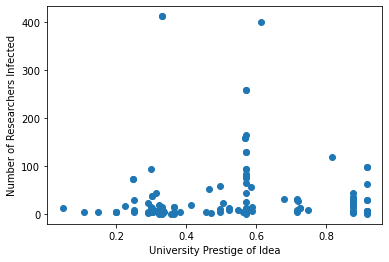

In [76]:
plt.scatter(list(patient_zero_df['prestige']), list(patient_zero_df['descendants_network'].apply(lambda x : len(x))))
plt.xlabel('University Prestige of Idea')
plt.ylabel('Number of Researchers Infected')
plt.show()

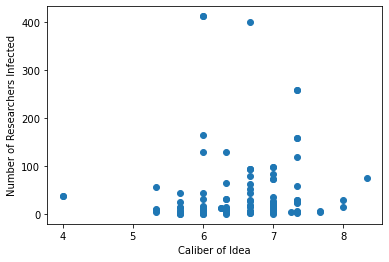

In [77]:
plt.scatter(list(patient_zero_df['rating']), list(patient_zero_df['descendants_network'].apply(lambda x : len(x))))
plt.xlabel('Caliber of Idea')
plt.ylabel('Number of Researchers Infected')
plt.show()

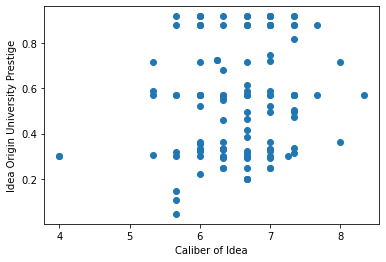

In [79]:
plt.scatter(list(patient_zero_df['rating']), list(patient_zero_df['prestige']))
plt.xlabel('Caliber of Idea')
plt.ylabel('Idea Origin University Prestige')
plt.show()

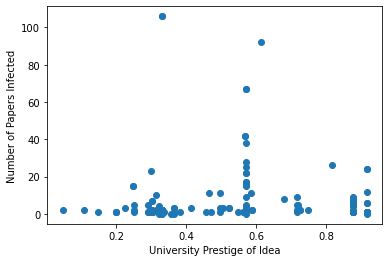

In [84]:
plt.scatter(list(patient_zero_df['prestige']), patient_zero_df['n_descendants'])
plt.xlabel('University Prestige of Idea')
plt.ylabel('Number of Papers Infected')
plt.show()

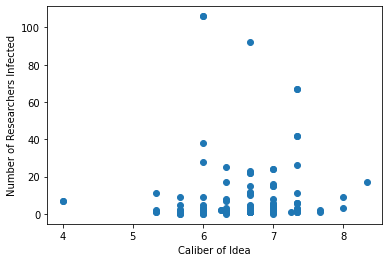

In [83]:
plt.scatter(list(patient_zero_df['rating']), list(patient_zero_df['n_descendants']))
plt.xlabel('Caliber of Idea')
plt.ylabel('Number of Papers Infected')
plt.show()